In [370]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [371]:
DATASET_PATH = './dataset/breast-cancer.csv'

df = pd.read_csv(DATASET_PATH)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [372]:
y = (df['diagnosis'] == 'M').astype(int).to_numpy() # Turn into 1 | 0

df = df.drop(columns=['id', 'diagnosis'])

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [373]:
print(f'Positive: {len(y[y == 1])}')
print(f'Negative: {len(y[y == 0])}')

Positive: 212
Negative: 357


In [374]:
df.shape

(569, 30)

In [375]:
# Define function for Z Score Scaling

def compute_std(X):
    return np.sqrt(np.sum((X - np.mean(X, axis= 0)) ** 2, axis= 0) / (X.shape[0] - 1))

def z_score_scaling(X):
    
    z = (X - np.mean(X, axis= 0)) / compute_std(X)

    return z


In [376]:
X = np.array(df)

print(f'Manual STD: {compute_std(X)}')

print(f'NumPy STD: {np.std(X, axis= 0)}')

Manual STD: [3.52404883e+00 4.30103577e+00 2.42989810e+01 3.51914129e+02
 1.40641281e-02 5.28127579e-02 7.97198087e-02 3.88028449e-02
 2.74142813e-02 7.06036280e-03 2.77312733e-01 5.51648393e-01
 2.02185455e+00 4.54910055e+01 3.00251794e-03 1.79081793e-02
 3.01860603e-02 6.17028517e-03 8.26637153e-03 2.64607097e-03
 4.83324158e+00 6.14625762e+00 3.36025423e+01 5.69356993e+02
 2.28324294e-02 1.57336489e-01 2.08624281e-01 6.57323412e-02
 6.18674675e-02 1.80612673e-02]
NumPy STD: [3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]


In [377]:
X_scaled = z_score_scaling(X)

print(X_scaled.shape)

print(f'Min: {np.min(X_scaled, axis= 0)}')

print(f'Max: {np.max(X_scaled, axis= 0)}')

(569, 30)
Min: [-2.027864   -2.22728873 -1.98275941 -1.45316445 -3.10934889 -1.60872084
 -1.11389274 -1.26071029 -2.74170466 -1.8182649  -1.05899233 -1.55289753
 -1.04313103 -0.73718043 -1.7745036  -1.29695702 -1.05657101 -1.9117653
 -1.53154243 -1.09600381 -1.72538237 -2.22203885 -1.69187236 -1.22134818
 -2.6803365  -1.44260906 -1.30468267 -1.7435287  -2.15905995 -1.60043128]
Max: [ 3.9677964   4.64779941  3.97263434  5.24591297  4.76671701  4.56440878
  4.23985819  3.92447653  4.48080822  4.90660199  8.89907909  6.64942855
  9.45366754 11.03213515  8.02293993  6.13808133 12.06206705  6.64375499
  7.06569999  9.84293183  4.09059011  3.88248887  4.28356837  5.92495906
  3.95189686  5.10838243  4.69653635  2.68351581  6.04072615  6.84083682]


In [378]:
# Define Sigmoid function

def sigmoid(z) -> float:

    return  1 / (1 + np.exp(-z))

def compute_f_wb_i(x, w, b):

    return sigmoid(np.dot(x, w) + b)

In [379]:
# Define function for computing loss and cost

def compute_loss_logistic(y_i, f_wb_i):

    return (-y_i * np.log(f_wb_i)) - ((1 - y_i) * np.log(1 - f_wb_i))

def compute_cost_logistic(X, y, w, b, lambda_ = 0.):

    m, n = X.shape

    cost = 0.

    for i in range(m):

        # print(np.dot(X[i], w) + b)

        f_wb_i = compute_f_wb_i(X[i], w, b)

        # print(sigmoid(np.dot(X[i], w) + b))

        cost += compute_loss_logistic(y[i], f_wb_i)

    cost /= m

    cost_reg = (lambda_ / (2 * m)) * np.sum(w ** 2)
      
    cost += cost_reg

    return cost

In [380]:
# Define function to compute gradient for gradient descent

def compute_gradient(X, y, w, b, lambda_ = 0.):

    m, n = X.shape

    dj_dw = np.zeros((n, )) # Array for num features
    dj_db = 0

    for i in range(m):

        f_wb_i = compute_f_wb_i(X[i], w, b)
        err_i = f_wb_i - y[i]

        for j in range(n):

            # print(X[i, j])
            dj_dw[j] += err_i * X[i,j] + ((lambda_ / m) * w[j])

        dj_db += err_i

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db


In [381]:
def gradient_descent(X, y, w, b, alpha, num_iters, lambda_ = 0.):

    # Cost history
    J_history = []

    for i in range(num_iters):

        dj_dw, dj_db = compute_gradient(X, y, w, b, lambda_)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 100 == 0:

            cost = compute_cost_logistic(X, y, w, b, lambda_)
            J_history.append(cost)

            print(f'Iter-{i} | cost: {cost}')

        
    return w, b, J_history

In [382]:
# Utility function

def train_test_split(x, y, ratio= 0.8):

    indices = np.random.permutation(len(x))

    split_idx = int(len(x) * ratio)
    
    x_train = x[indices[:split_idx]]
    x_test = x[indices[split_idx:]]
    y_train = y[indices[:split_idx]]
    y_test = y[indices[split_idx:]]

    return x_train, x_test, y_train, y_test
    
def plot_cost(J_history, num_iters):

    plt.plot(J_history, marker='o')
    plt.xlabel('Iteration (100)')
    plt.xticks(range(len(J_history)))
    plt.title(f'Cost History for {num_iters} iterations')

Initial weight: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Initial bias: 0.0
Initial cost: 0.6931471805599468

Iter-0 | cost: 0.6354405093398211
Iter-100 | cost: 0.15516409177984328
Iter-200 | cost: 0.11985217947041212
Iter-300 | cost: 0.10459724698038231
Iter-400 | cost: 0.09563707257507986
Iter-500 | cost: 0.08957342466811878
Iter-600 | cost: 0.08511827466593598
Iter-700 | cost: 0.08166343108010962
Iter-800 | cost: 0.07887987807086706
Iter-900 | cost: 0.07657227092410296

Final weight: [ 0.50357538  0.52921316  0.49685326  0.50128384  0.17467429  0.08794976
  0.43138431  0.55603605  0.04800188 -0.24255173  0.526234    0.05693675
  0.4157397   0.45078062  0.02323209 -0.25133534 -0.11960914  0.08027519
 -0.12970961 -0.2744372   0.62439652  0.70341811  0.58705923  0.59321773
  0.41368084  0.20751088  0.40373388  0.56812326  0.44995637  0.14177874], bias: -0.36907234348323603


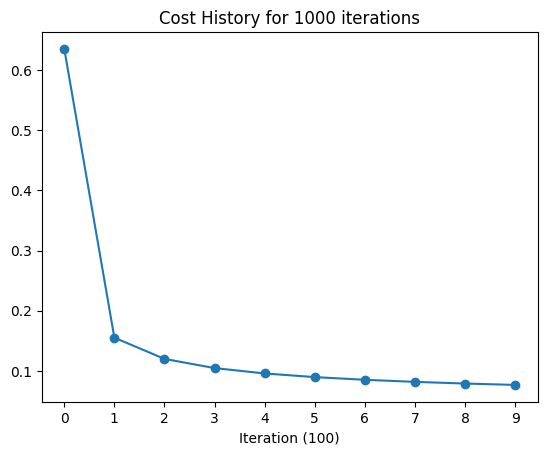

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, ratio= 0.8)


w = np.random.random_sample(X_train.shape[-1])
w = np.zeros(X_train.shape[-1])
b = 0.
alpha = 0.03
num_iters = 1000
lambda_ = 0.05


print(f'Initial weight: {w}')
print(f'Initial bias: {b}')

print(f'Initial cost: {compute_cost_logistic(X_train, y_train, w, b)}')

print()
w_final, b_final, J_history = gradient_descent(X_train, y_train, w, b, alpha, num_iters, lambda_)
print()

print(f'Final weight: {w_final}, bias: {b_final}')

plot_cost(J_history, num_iters)

In [384]:
threshold = 0.7

m, n = X_test.shape

accuracy = 0.

for i in range(m):

    y_pred = f_wb_i = compute_f_wb_i(X_test[i], w_final, b) >= threshold

    # print(y_pred, y_test[i])

    accuracy += y_test[i] == y_pred

accuracy /= m

print(f'Accuracy: {accuracy * 100:.2f}%')
    

Accuracy: 97.37%
